In [13]:
import pandas as pd

In [14]:
df_train=pd.read_csv('titanicData.csv')
print(df_train.shape)
df_train.head(3)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [17]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
type(df_train)

pandas.core.frame.DataFrame

In [44]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [46]:
df_train.Embarked.value_counts()
# GK:  boarding ponts:       'Southampton', england      'Cherbourg', france          'Queenstown' (cobh), ireland

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [47]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
pd.isnull(df_train['Age'])

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [29]:
df_train=df_train.drop(['Cabin','PassengerId','Name','Ticket'],axis=1)
df_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [51]:
df_train['Age'].mean()          

29.69911764705882

In [52]:
df_train.groupby('Pclass')['Age'].mean()              #this is more precise

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [56]:
def age_approx(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 38
        elif pclass==2:
            return 29
        else:
            return 25
    else:
        return age

In [57]:
df_train['Age']=df_train[['Age','Pclass']].apply(age_approx, axis=1)

In [58]:
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [59]:
df_train.dropna(inplace=True)
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [60]:
df_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [61]:
#pd.get_dummies(df_train['Sex'])
df_train_dummied=pd.get_dummies(df_train,columns=['Sex'])
df_train_dummied=pd.get_dummies(df_train_dummied,columns=['Embarked'])

df_train_dummied

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,25.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [62]:
import matplotlib.pyplot as plt

<AxesSubplot:>

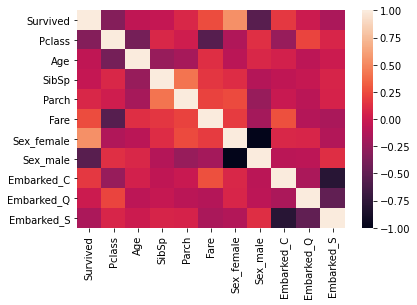

In [63]:
import seaborn as sns

sns.heatmap(df_train_dummied.corr())

***

In [64]:
X=df_train_dummied[['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].values
y=df_train_dummied['Survived']

In [65]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=.3,random_state=42)

In [66]:
from sklearn.linear_model import LogisticRegression 

In [67]:
logReg=LogisticRegression()

In [75]:
891*.7


623.6999999999999

In [76]:
891*.3


267.3

In [68]:
logReg.fit(Xtrain,ytrain)

C:\Users\adity\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

'Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'

In [77]:
predicted=logReg.predict(Xtest)

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [79]:
cm=confusion_matrix(ytest,predicted)
print(cm)

[[136  31]
 [ 25  75]]


In [80]:
(136+75)/267

0.7902621722846442

In [30]:
accuracy_score(ytest,predicted)

0.797752808988764

In [31]:
print(classification_report(ytest,predicted))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       167
           1       0.72      0.75      0.74       100

    accuracy                           0.80       267
   macro avg       0.78      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



In [32]:
logReg.predict_proba(Xtest)

array([[0.90126244, 0.09873756],
       [0.04169809, 0.95830191],
       [0.20743378, 0.79256622],
       [0.75221838, 0.24778162],
       [0.03412917, 0.96587083],
       [0.89672044, 0.10327956],
       [0.70273312, 0.29726688],
       [0.86543049, 0.13456951],
       [0.07731452, 0.92268548],
       [0.033891  , 0.966109  ],
       [0.60111406, 0.39888594],
       [0.43608961, 0.56391039],
       [0.96649361, 0.03350639],
       [0.8739563 , 0.1260437 ],
       [0.90562571, 0.09437429],
       [0.90126244, 0.09873756],
       [0.67595094, 0.32404906],
       [0.80660092, 0.19339908],
       [0.73063286, 0.26936714],
       [0.88197065, 0.11802935],
       [0.73110934, 0.26889066],
       [0.08670427, 0.91329573],
       [0.94901571, 0.05098429],
       [0.43208067, 0.56791933],
       [0.88197065, 0.11802935],
       [0.45677957, 0.54322043],
       [0.6958229 , 0.3041771 ],
       [0.14486593, 0.85513407],
       [0.57683282, 0.42316718],
       [0.71307654, 0.28692346],
       [0.

In [33]:
logReg.score(Xtest,ytest)

0.797752808988764